In [51]:
import numpy as np
import copy
from IPython.display import HTML
from matplotlib import pyplot as plt, colors
import dill

import SimPEG as simpeg
from SimPEG.EM import NSEM

import sys
sys.path.append("../../../../pymatsolver/")
from pymatsolver import PardisoSolver
sys.path.append("../../../../../Dropbox/PhD_UBC/telluricpy/")
import telluricpy


# Set some matplotlib settings
%matplotlib notebook

In [52]:
mtData = dill.load(open('vertical_contact_mtData_1e2_1e1.pklb','rb'))

<IPython.core.display.Javascript object>


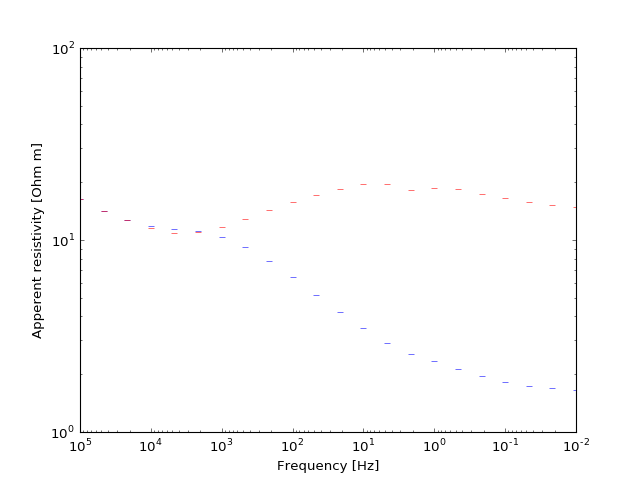

In [53]:
mtData.plot_app_res(np.array([55.,0.]))

<IPython.core.display.Javascript object>


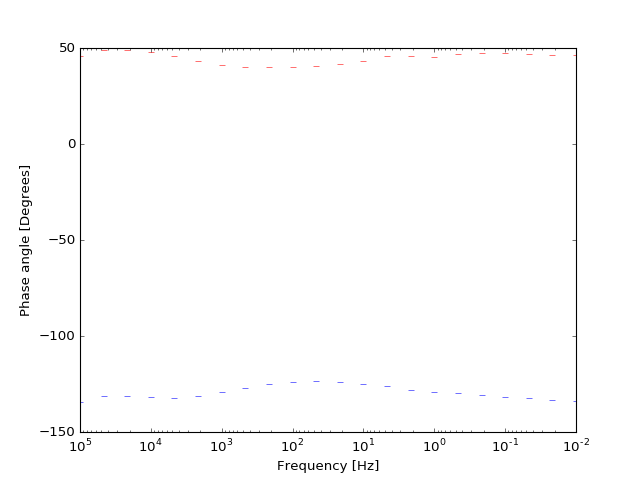

In [54]:
mtData.plot_app_phs(np.array([55.,0.]))

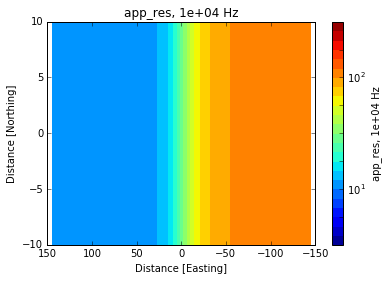

In [14]:
cont_kwargs={'levels':np.logspace(0.5,2.5,25),'norm':colors.LogNorm()}
component = 'app_res'
freq = 1e4
mtData.map_iso_frequency(freq, 'Z', 'yx', component=component,ax=None, plot_error=False, **cont_kwargs)
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))


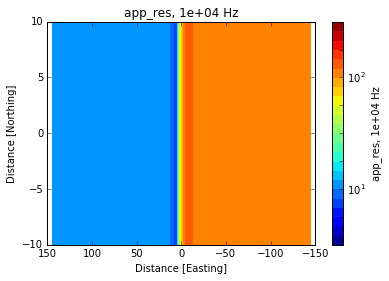

In [15]:
# cont_kwargs={'levels':np.linspace(600,1400,17)}#,'norm':colors.LogNorm()}
component = 'app_res'
freq = 1e4
mtData.map_iso_frequency(freq, 'Z', 'xy', component=component,ax=None, plot_error=False, **cont_kwargs)
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))


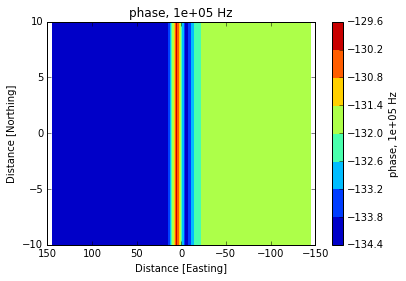

In [47]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'Z', 'xy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

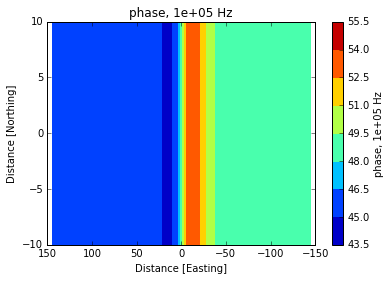

In [46]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'Z', 'yx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

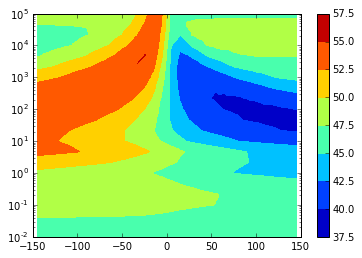

In [16]:
#cont_args = {'levels':np.logspace(1.5,2.2,8*4+1)}#,'norm':colors.LogNorm()}
cont_args = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
fig, ax, cont = mtData.section_plot({'y':0.},'Z','yx','phase',ax=None, plot_error=False)#, **cont_args)
ax.set_yscale('log')
plt.colorbar(cont)

In [9]:
cont_args = {'levels':np.linspace(100.,1000.,10),'norm':colors.LogNorm()}


In [10]:
cont_args

{'levels': array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
          900.,  1000.]), 'norm': <matplotlib.colors.LogNorm at 0x1d864a58>}

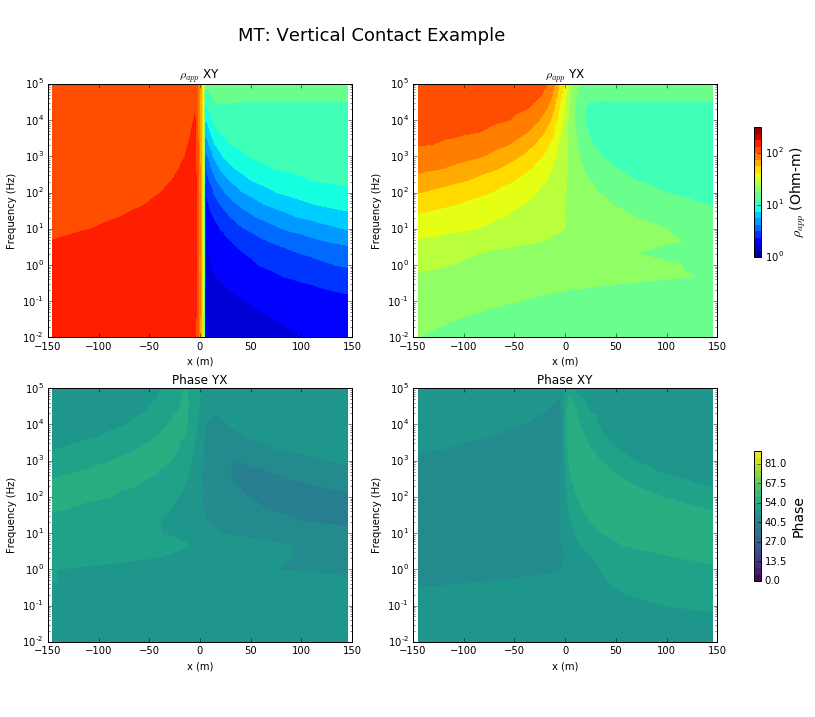

In [45]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.logspace(0.,2.5,21),'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-180.,-90.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(0.,90.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'Z','xy','app_res',ax=ax0, plot_error=False, **cont_args_app_res)
fig,ax1,cont_phasexy = mtData.section_plot({'y':0.},'Z','xy','phase',ax=ax1, plot_error=False, **cont_args_phasexy)
fig,ax2,cont_appresyx = mtData.section_plot({'y':0.},'Z','yx','app_res',ax=ax2, plot_error=False, **cont_args_app_res)
fig,ax3,cont_phaseyx = mtData.section_plot({'y':0.},'Z','yx','phase',ax=ax3, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'$\rho_{app}$ XY')
ax2.set_title(r'$\rho_{app}$ YX')
ax1.set_title(r'Phase XY')
ax3.set_title(r'Phase YX')

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax,ticks=[1,10,100])#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Vertical Contact Example',fontsize =18.)

#plt.tight_layout()

In [34]:
sym_log_levels

array([ -1.00000000e+00,  -7.94328235e-01,  -6.30957344e-01,
        -5.01187234e-01,  -3.98107171e-01,  -3.16227766e-01,
        -2.51188643e-01,  -1.99526231e-01,  -1.58489319e-01,
        -1.25892541e-01,  -1.00000000e-01,  -7.94328235e-02,
        -6.30957344e-02,  -5.01187234e-02,  -3.98107171e-02,
        -3.16227766e-02,  -2.51188643e-02,  -1.99526231e-02,
        -1.58489319e-02,  -1.25892541e-02,  -1.00000000e-02,
        -7.94328235e-03,  -6.30957344e-03,  -5.01187234e-03,
        -3.98107171e-03,  -3.16227766e-03,  -2.51188643e-03,
        -1.99526231e-03,  -1.58489319e-03,  -1.25892541e-03,
        -1.00000000e-03,  -7.94328235e-04,  -6.30957344e-04,
        -5.01187234e-04,  -3.98107171e-04,  -3.16227766e-04,
        -2.51188643e-04,  -1.99526231e-04,  -1.58489319e-04,
        -1.25892541e-04,  -1.00000000e-04,   1.00000000e-04,
         1.25892541e-04,   1.58489319e-04,   1.99526231e-04,
         2.51188643e-04,   3.16227766e-04,   3.98107171e-04,
         5.01187234e-04,

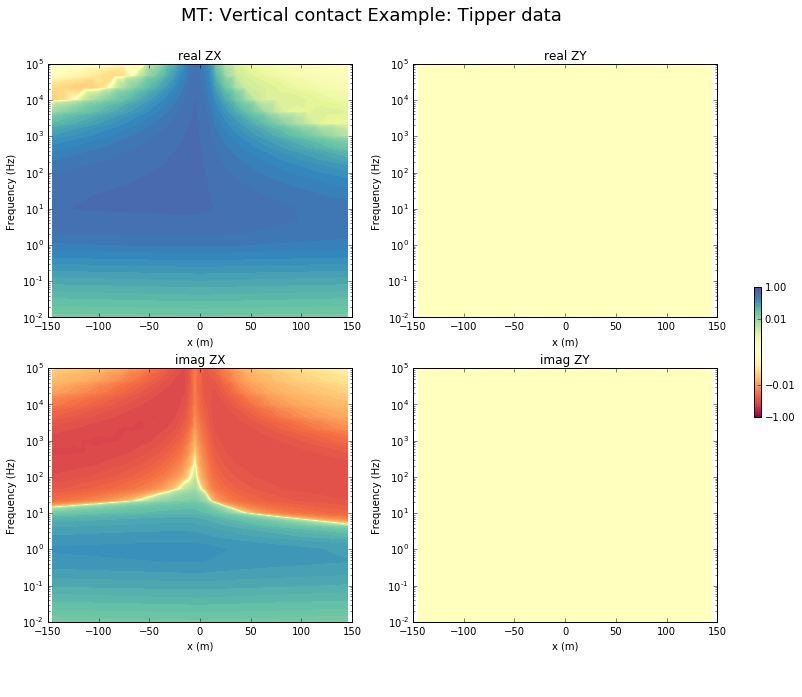

In [44]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax1 = plt.subplot(223)
ax2 = plt.subplot(222)
ax3 = plt.subplot(224)

log_levels = np.logspace(-4,0,41)
sym_log_levels = np.concatenate((-log_levels[::-1],log_levels))
cont_args_tip = {'levels':sym_log_levels,'cmap':'Spectral','norm':colors.SymLogNorm(1e-3,linscale=1)}
cont_args_tip_imag = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis','norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_trzx = mtData.section_plot({'y':0.},'T','zx','real',ax=ax0, plot_error=False, **cont_args_tip)
fig,ax1,cont_tizx = mtData.section_plot({'y':0.},'T','zx','imag',ax=ax1, plot_error=False, **cont_args_tip)
fig,ax2,cont_trzy = mtData.section_plot({'y':0.},'T','zy','real',ax=ax2, plot_error=False, **cont_args_tip)
fig,ax3,cont_tizy = mtData.section_plot({'y':0.},'T','zy','imag',ax=ax3, plot_error=False, **cont_args_tip)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'real ZX')
ax1.set_title(r'imag ZX')
ax2.set_title(r'real ZY')
ax3.set_title(r'imag ZY')

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.9])
cbar_ax.axis('off')
cb = plt.colorbar(cont_trzx, ax=cbar_ax, ticks=[-1,-1e-2,1e-2,1])#,format = formatter)
# cb.set_label(r'Tipper',fontsize = 14.)

#cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
#cbar_ax.axis('off')
#cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
#cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Vertical contact Example: Tipper data',fontsize =18.)

#plt.tight_layout()

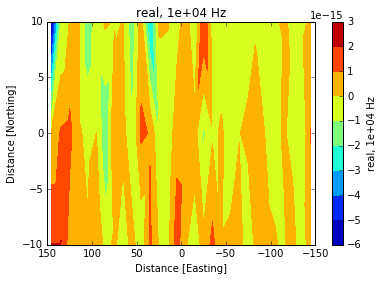

In [23]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

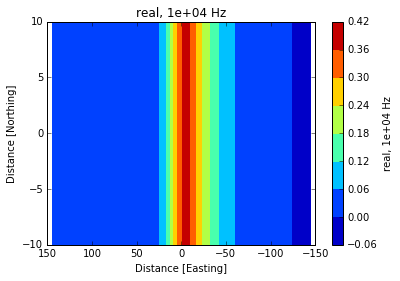

In [24]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

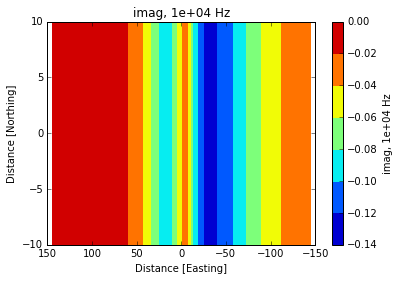

In [25]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

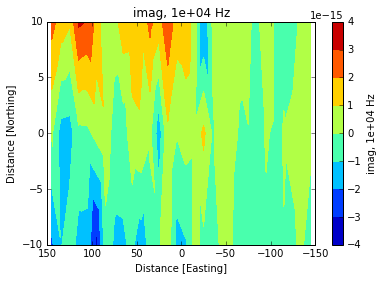

In [26]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

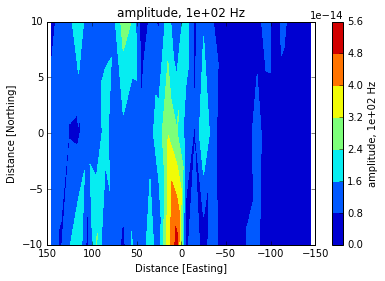

In [31]:
component = 'amplitude'
freq = 1e2
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

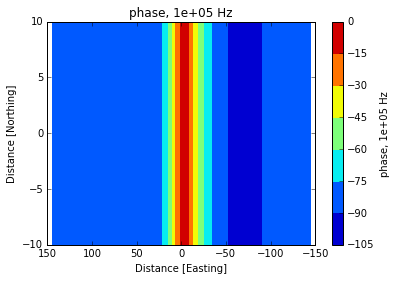

In [28]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

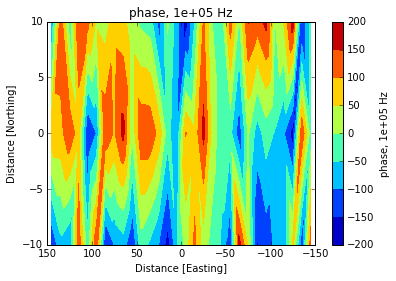

In [29]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

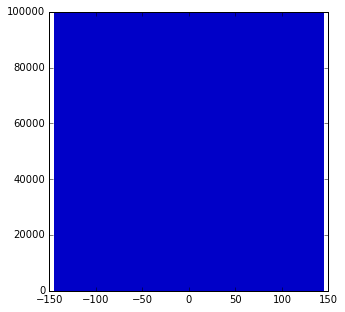

In [30]:
fig = plt.figure(figsize= (5,5))
ax0 = plt.subplot(111)


cont_args_app_res = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'T','zy','amplitude',ax=ax0, plot_error=False)#, **cont_args_app_res)